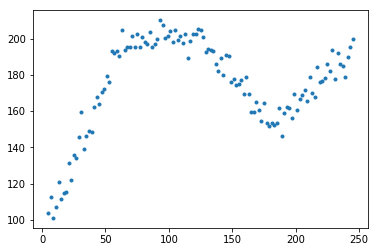

In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

df = pd.read_excel("TestData.xlsx")

xdata = np.array(df['TIME'])
ydata = np.array(df['yData'])

plt.plot(xdata, ydata, '.')
plt.show()

In [4]:
def CalculateBreaksAndPlot(xdata, ydata, x, y, dy, d2y):
    ranges=[[-1000,-0.5],[-0.5,0.5],[0.5,1000]]
    breaks = [xdata[0]]
    for ran in range(len(ranges)):
        if ranges[ran][0] <= dy[0] <= ranges[ran][-1]:
            firstSlope = ran

    for i in range(len(dy)):
        for ran in range(len(ranges)):
            if ranges[ran][0] <= dy[i] <= ranges[ran][-1]:
                thisSlope = ran
                break
        if thisSlope == firstSlope:
            continue
        else:
            breaks.append(x[i])
            firstSlope = thisSlope

    plt.plot(xdata,ydata, '.')
    for i in range(len(breaks)):
        plt.axvline(x=breaks[i], linestyle='--')
    plt.show()

    plt.plot(x, y, '.')
    for i in range(len(breaks)):
        plt.axvline(x=breaks[i], linestyle='--')
    plt.show()

    plt.plot(x, dy, '.')
    for i in range(len(breaks)):
        plt.axvline(x=breaks[i], linestyle='--')
    plt.show()
    plt.plot(x, d2y)
    for i in range(len(breaks)):
        plt.axvline(x=breaks[i], linestyle='--')
    plt.show()
    
    return

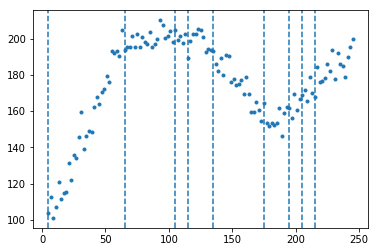

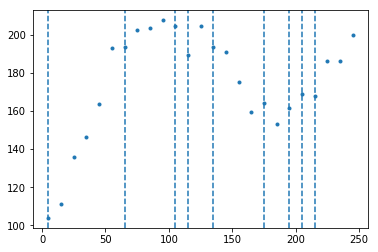

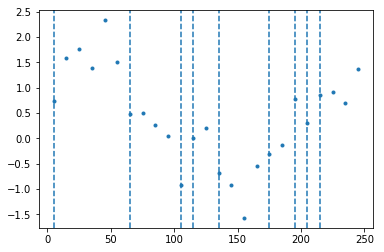

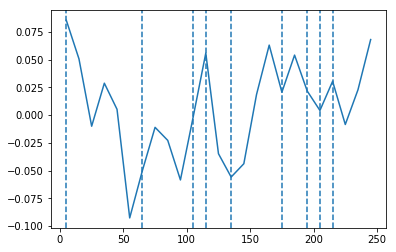

In [7]:
# take every 5th point

n_points = 5

ydata1 = [ydata[i] for i in range(len(ydata)) if i % n_points == 0]
xdata1 = [xdata[i] for i in range(len(ydata)) if i % n_points == 0]

dy = np.gradient(ydata1, xdata1)
d2y = np.gradient(dy, xdata1)
CalculateBreaksAndPlot(xdata, ydata, xdata1, ydata1, dy, d2y)

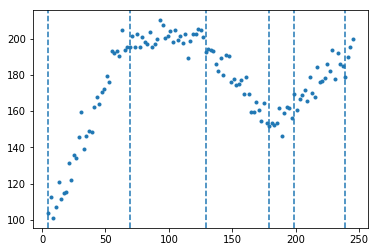

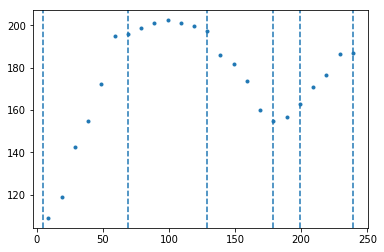

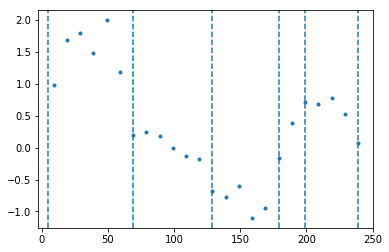

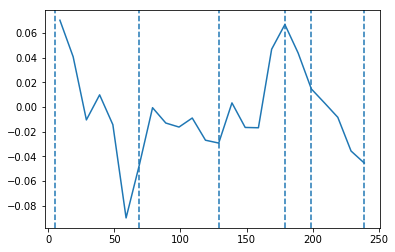

In [6]:
# centroid of every five points

n_points = 5

yAvg = [sum(ydata[i:i+n_points])/n_points for i in range(0,len(ydata),n_points)][:-1]
xAvg = [sum(xdata[i:i+n_points])/n_points for i in range(0,len(xdata),n_points)][:-1]

dyAvg = np.gradient(yAvg, xAvg)
d2yAvg = np.gradient(dyAvg, xAvg)

sets = [[]]
setIndex = 0

CalculateBreaksAndPlot(xdata, ydata, xAvg, yAvg, dyAvg, d2yAvg)